# 

In [23]:
import pandas as pd 
import requests
from urllib.request import urlparse, urljoin
from bs4 import BeautifulSoup

In [24]:
def is_valid(url):
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

def get_all_website_links(url):
    global internal
    urls = set()
    domain_name = urlparse(url).netloc
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    for a_tag in soup.findAll("a"):
        href = a_tag.attrs.get("href")
        if href == "" or href is None:
            continue
        href = urljoin(url, href)
        parsed_href = urlparse(href)
        href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path
        if not is_valid(href):
            continue
        if href in internal:
            continue
        if domain_name not in href:
        urls.add(href)
        internal.add(href)
    return urls


import networkx as nx

r_url = 'http://delfin45.ru/'
graph = nx.Graph()
graph.add_node(r_url)
df = pd.DataFrame(columns=['url','pagerank'])
total_urls_visited = 0
internal = set()


def crawl(url, max_urls=50):
    global total_urls_visited
    global graph
    global df
    
    total_urls_visited += 1
    links = get_all_website_links(url)
    for link in links:
        graph.add_node(link)
        graph.add_edge(url,link)
        
        if total_urls_visited > max_urls:
            break
        crawl(link, max_urls=max_urls)
        
    pagerank = nx.pagerank_numpy(graph, alpha=0.85, personalization=None,  weight='weight', dangling=None)
    df = pd.concat([df, pd.DataFrame([[url, pagerank.get(url)]],columns=['url','pagerank'])])  

In [25]:
crawl(r_url)
for link in internal_urls:
    print(link)

http://delfin45.ru/news/2020-09-29
http://delfin45.ru/index/politika_obrabotki_personalnykh_dannykh_turagentstvo_delfin/0-85
http://delfin45.ru/news/2019-12-11
http://delfin45.ru/news/2019-04-16
http://delfin45.ru/news/2020-05-09
http://delfin45.ru/news/grafik_turov_vykhodnogo_dnja/2016-12-14-480
http://delfin45.ru/news/2019-10
http://delfin45.ru/news/2019-07-17
http://delfin45.ru/news/poezdki_na_nojabr/2019-10-31-706
http://delfin45.ru/news/2020-03-03
http://delfin45.ru/news/2019-06-05
http://delfin45.ru/news/2019-04-23
http://delfin45.ru/news/2019-08-07
http://delfin45.ru/news/2020-09-24
http://delfin45.ru/news/novyj_adres/2018-09-04-626
http://delfin45.ru/index/turoperatory/0-82
http://delfin45.ru/news/2020-03-06
http://delfin45.ru/news/2019-09-30
http://delfin45.ru/index/quot_gorjashhaja_zagranka_quot/0-46
http://delfin45.ru/news/2020-09
http://delfin45.ru/news/2019-04-01
http://delfin45.ru/news/v_gosti_k_dedu_morozu_velikij_ustjug_2020/2019-10-10-703
http://delfin45.ru/news/2020-0

http://delfin45.ru/_si/0/86157826.jpg
http://delfin45.ru/news/avtobusnyj_tur_na_altaj_iz_kurgana/2019-07-25-690
http://delfin45.ru/
http://delfin45.ru/news/khoroshee_predlozhenie_po_abkhazii_v_mae/2019-04-17-675
http://delfin45.ru/news/2020-05-31
http://delfin45.ru/news/2019-08-08
http://delfin45.ru/news/2019-00
http://delfin45.ru/news/vtoroe_mesto_sredi_luchshikh_po_rossii_v_sfere_turizma/2019-10-09-701


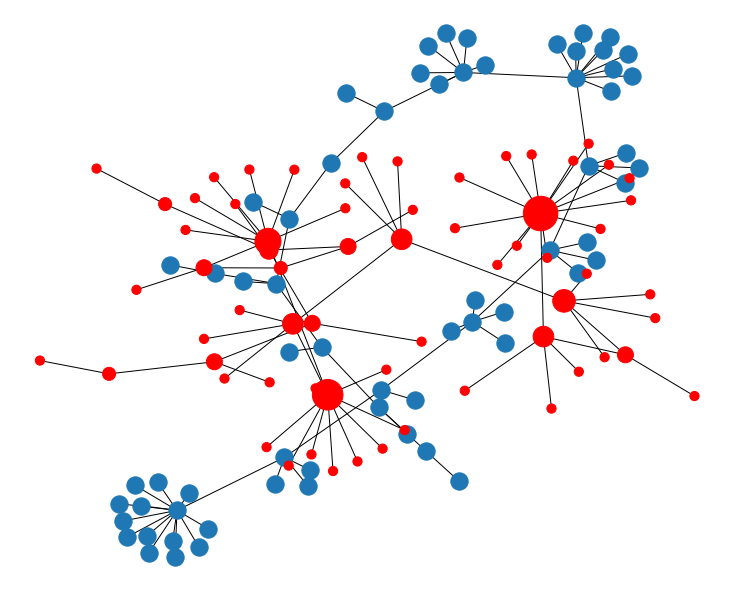

<Figure size 504x360 with 0 Axes>

In [39]:
import matplotlib
import matplotlib.pyplot as plt

def draw_graph(g):
    pagerank = nx.pagerank_numpy(g, alpha=0.85, personalization=None,  weight='weight', dangling=None)
    nodesize=[g.degree(n)*85 for n in g]
    pos=nx.spring_layout(g,iterations=20)
    
    nx.draw(g,with_labels=False,font_weight='bold')
    nx.draw_networkx_nodes(g,pos,node_size=nodesize,node_color='r')
    nx.draw_networkx_edges(g,pos)
#     nx.draw_networkx_labels(g, pos=nx.spring_layout(g), font_size=4)
    plt.figure(figsize=(7,5))
    plt.show()
    
plt.figure(figsize=(10,8))
draw_graph(graph)

In [40]:
pagerank = nx.pagerank_numpy(graph, alpha=0.85, personalization=None,  weight='weight', dangling=None)
df

,url,pagerank
0,http://delfin45.ru/news/sankt_peterburg_stanov...,0.109744
0,http://delfin45.ru/news/2020-09-29,0.199397
0,http://delfin45.ru/news/2019-11-08,0.058327
0,http://delfin45.ru/news/akcija_rannee_bronirov...,0.051312
0,http://delfin45.ru/news/2019-11-18,0.046186
0,http://delfin45.ru/news/razbiraem/2019-11-18-710,0.042163
0,http://delfin45.ru/news/otlichnye_ceny/2019-11...,0.038872
0,http://delfin45.ru/news/poezdki_na_nojabr/2019...,0.036116
0,http://delfin45.ru/news/poezdki_v_tjumen_20_ok...,0.033243
0,http://delfin45.ru/news/akcija/2019-10-01-700,0.030961


In [41]:
def PR(graph, d=0.3, prs={}): 
    if not prs:
        keys = list(graph.nodes())
        values = [1 for i in graph.nodes()]

        for key in keys: 
            for value in values: 
                prs[key] = value 
                values.remove(value) 
                break 
                
    for g in list(graph.nodes()):
        prs[g] = (1-d) + d * sum([prs[Ti[1]]/len(graph.edges(Ti[1])) for Ti in list(graph.edges(g))]) 
        
    return prs


In [43]:
prs = {}
for i in range(100):
    prs = PR(graph, prs=prs)
    
prs

{'http://delfin45.ru/': 1.0812273428065298,
 'http://delfin45.ru/index/grafik_quot_turov_vykhodnogo_dnja_quot/0-48': 1.2257211238023604,
 'http://delfin45.ru/news/akvapark_leto_leto/2020-10-01-757': 1.1676538866731019,
 'http://delfin45.ru/news/2020-00': 1.3340287692356387,
 'http://delfin45.ru/news/2020-09-29': 1.057646238421647,
 'http://delfin45.ru/news/sankt_peterburg_stanovitsja_blizhe/2020-09-29-754': 0.858646935763247,
 'http://delfin45.ru/news/2020-02-06': 1.1860079749727959,
 'http://delfin45.ru/news/2020-01': 0.9358371868729282,
 'http://delfin45.ru/news/2019-12': 1.1723638937564858,
 'http://delfin45.ru/news/2019-11': 2.315130637676056,
 'http://delfin45.ru/news/2019-11-08': 0.7868173989128521,
 'http://delfin45.ru/news/akcija_rannee_bronirovanie_ot_turoperatora_alean_v_dejstvii/2019-11-18-709': 0.7868173989128521,
 'http://delfin45.ru/news/2019-11-18': 0.7868173989128521,
 'http://delfin45.ru/news/razbiraem/2019-11-18-710': 0.7868173989128521,
 'http://delfin45.ru/news/otli

In [44]:
print(f'Кол-во внутренних ссылок: {len(pagerank)}\n')
print(f'Сумма всех PR: {sum(v[1] for v in prs.items())}\n')

Кол-во внутренних ссылок: 65

Сумма всех PR: 65.00000000000004



In [45]:
def normalize(prs):
    amin, amax = min([v[1] for v in prs.items()]), max([v[1] for v in prs.items()])
    for key, val in prs.items():
        prs[key] = (val-amin) / (amax-amin)
        
    return prs

In [46]:
prs = {k: v for k, v in reversed(sorted(prs.items(), key=lambda item: item[1]))}

show = pd.DataFrame.from_dict(prs,orient='index',columns=['Rank'])
show

,Rank
http://delfin45.ru/news/2019-04,3.848393
http://delfin45.ru/news/2019-10,2.992841
http://delfin45.ru/news/2019-11,2.315131
http://delfin45.ru/news/2019-07,1.861394
http://delfin45.ru/news/2019-05,1.612951
...,...
http://delfin45.ru/news/2019-10-09,0.781623
http://delfin45.ru/news/2019-10-31,0.781623
http://delfin45.ru/news/akcija/2019-10-01-700,0.781623
http://delfin45.ru/news/poezdki_v_tjumen_20_oktjabrja/2019-10-16-705,0.781623
